#imports

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#load dataset


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

seen how the image looks like

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#Data Preprocessing

make inputs between 0 and 1

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#build the model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

#compile the modul

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the modul

In [15]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4975 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3386 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2823 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

#test the model

get accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3404 - accuracy: 0.8837
Test accuracy: 0.8837000131607056


get predictions array

In [17]:
predictions = model.predict(test_images)

see first prediction

In [ ]:
i = 19
print("prdictions list of the", i, "image in test array:", predictions[i],"\n")

print(class_names[np.argmax(predictions[i])])

plt.figure()
plt.imshow(test_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

program that take as inpt a number and see predicting and if the prediction is correct

Pick a number: 40
Excpected: Shirt


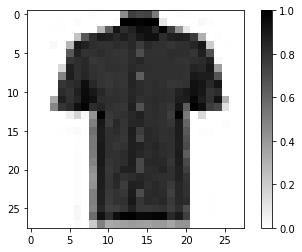

Guess: T-shirt/top


In [31]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  print("Excpected: " + label)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Guess: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
